In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from preprocessing import Word_Embedder
from preprocessing import Text_processing
from text_classification import Text_classification
from text_classification import prepare_data_for_text_classification

In [3]:
df = pd.read_csv('mari-train-balanced.csv')
df2 = pd.read_csv('mari-test-balanced.csv')
df.head()

,texts,texts_deepcut,action,object,destination
0,สอบถาม package internet ว่ามีแบบไหนบ้างครับ,สอบถาม package internet ว่า มี แบบ ไหน บ้าง ครับ,enquire,promotion,promotions
1,พอดีพี่ซื้อเบอร์ซิม Inter ไปแล้ว แต่ยังไม่ได้ล...,พอดี พี่ ซื้อ เบอร์ซิม Inter ไป แล้ว แต่ ยัง ไ...,enquire,detail,billing and payment
2,ค่ะ พี่ค่ะ คืออยู่ๆ เน็ตเล่นไม่ได้อ่ะค่ะ,ค่ะ พี่ ค่ะ คือ อยู่ ๆ เน็ต เล่น ไม่ ได้ อ่ะ ค่ะ,enquire,internet,internet
3,การเปลี่ยน ระบบจาก ทรู เป็น ทรูเอช มีค่าบริการ...,การ เปลี่ยน ระบบ จาก ทรู เป็น ทรูเอช มี ค่า บร...,enquire,rate,promotions
4,เช็คให้หน่อยได้ไหมครับ ว่าเบอร์ของผม เปลี่ยนเป...,เช็ค ให้ หน่อย ได้ ไหม ครับ ว่า เบอร์ ของ ผม เ...,enquire,package,promotions


In [4]:
df = df.rename(columns={'destination': 'labels'})[['texts', 'labels']]
df2 = df2.rename(columns={'destination': 'labels'})[['texts', 'labels']]

In [5]:
df.head()

,texts,labels
0,สอบถาม package internet ว่ามีแบบไหนบ้างครับ,promotions
1,พอดีพี่ซื้อเบอร์ซิม Inter ไปแล้ว แต่ยังไม่ได้ล...,billing and payment
2,ค่ะ พี่ค่ะ คืออยู่ๆ เน็ตเล่นไม่ได้อ่ะค่ะ,internet
3,การเปลี่ยน ระบบจาก ทรู เป็น ทรูเอช มีค่าบริการ...,promotions
4,เช็คให้หน่อยได้ไหมครับ ว่าเบอร์ของผม เปลี่ยนเป...,promotions


In [6]:
tmp_data = prepare_data_for_text_classification(df,df2,64,1)

billing and payment      3916
promotions               2280
other queries            1823
internet                 1588
international dialing     336
true money                188
lost and stolen           172
Name: labels, dtype: int64


C:\Users\Admin\Anaconda3\envs\text_bay\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0 1 2 3 4 5 6], y=[1 0 3 ... 0 0 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


CW2: {0: 0.3758572887786371, 1: 0.6455513784461153, 2: 0.8073818666248727, 3: 0.9268621806405182, 4: 4.380527210884353, 5: 7.829027355623101, 6: 8.557308970099667}


In [7]:
tc =Text_classification(tmp_data, True, True, False)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
word_vectors (InputLayer)       [(None, 64, 300)]    0                                            
__________________________________________________________________________________________________
masks (InputLayer)              [(None, 64)]         0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 64, 256)      330240      word_vectors[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 64, 256)      296448      bidirectional[0][0]              
______________________________________________________________________________________________

Linear classifier part
running 5-fold cv
Best C: 5, Best f1-scores: [0.88116243 0.90909091 0.77590361 0.88172043 0.80133185 0.85617597
 0.95238095]
0.8473341004986574


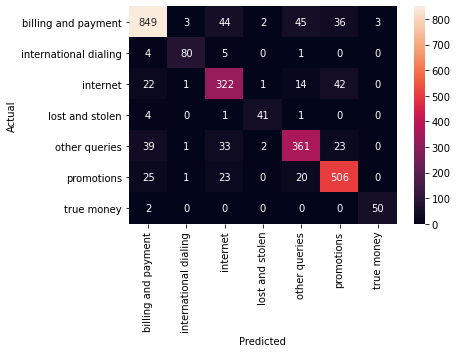

In [8]:
tc.fit_linear_classifier()

Epoch 1/500
    161/Unknown - 13s 79ms/step - loss: 2.2838 - precision: 0.6147 - recall: 0.1985WARNING:tensorflow:From C:\Users\Admin\Anaconda3\envs\text_bay\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: DL_model\assets
161/161 [==============================] - 58s 361ms/step - loss: 2.2838 - precision: 0.6147 - recall: 0.1985 - val_loss: 2.2388 - val_precision: 0.9286 - val_recall: 0.0199 - lr: 0.0010
Epoch 2/500
161/161 [==============================] - 55s 345ms/step - loss: 1.5419 - precision: 0.7455 - recall: 0.4418 - val_loss: 1.6201 - val_precision: 0.8994 - val_recall: 0.4288 - lr: 0.0010
Epoch 3/500
161/161 [==============================] - 58s 363ms/step - loss: 1.3358 - precis

Epoch 27/500
161/161 [==============================] - 40s 251ms/step - loss: 0.6960 - precision: 0.8188 - recall: 0.7085 - val_loss: 1.3229 - val_precision: 0.7121 - val_recall: 0.6091 - lr: 0.0010
Epoch 28/500
161/161 [==============================] - 47s 294ms/step - loss: 0.6782 - precision: 0.8144 - recall: 0.7170 - val_loss: 0.9926 - val_precision: 0.8135 - val_recall: 0.6878 - lr: 0.0010
Epoch 29/500
161/161 [==============================] - 39s 244ms/step - loss: 0.6923 - precision: 0.8136 - recall: 0.7067 - val_loss: 0.9880 - val_precision: 0.7742 - val_recall: 0.7023 - lr: 0.0010
Epoch 30/500
161/161 [==============================] - 37s 231ms/step - loss: 0.6841 - precision: 0.8158 - recall: 0.7180 - val_loss: 0.8946 - val_precision: 0.8424 - val_recall: 0.7177 - lr: 0.0010
Epoch 31/500
161/161 [==============================] - 78s 482ms/step - loss: 0.6748 - precision: 0.8150 - recall: 0.7188 - val_loss: 0.8185 - val_precision: 0.8492 - val_recall: 0.7518 - lr: 0.0010


Epoch 59/500
161/161 [==============================] - 33s 204ms/step - loss: 0.4302 - precision: 0.8636 - recall: 0.8109 - val_loss: 0.6994 - val_precision: 0.8451 - val_recall: 0.7932 - lr: 1.0000e-04
Epoch 60/500
161/161 [==============================] - 32s 201ms/step - loss: 0.4186 - precision: 0.8674 - recall: 0.8169 - val_loss: 0.6914 - val_precision: 0.8477 - val_recall: 0.7963 - lr: 1.0000e-04
Epoch 61/500
161/161 [==============================] - 31s 195ms/step - loss: 0.4257 - precision: 0.8651 - recall: 0.8115 - val_loss: 0.6874 - val_precision: 0.8442 - val_recall: 0.7921 - lr: 1.0000e-04
Epoch 62/500
161/161 [==============================] - 32s 201ms/step - loss: 0.4227 - precision: 0.8645 - recall: 0.8091 - val_loss: 0.6880 - val_precision: 0.8398 - val_recall: 0.7940 - lr: 1.0000e-04
f1-scores
[[799  44  63  59   5   9   3]
 [ 34 484  19  35   1   2   0]
 [ 38  30 348  42   0   1   0]
 [ 11  33  18 336   2   1   1]
 [  2   1   0   4  83   0   0]
 [  4   3   0   0  

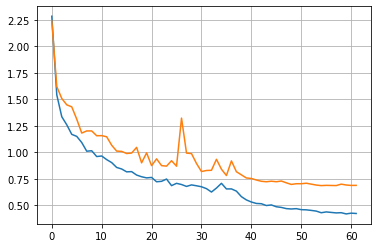

In [9]:
tc.fit_deep_learning()